<a href="https://colab.research.google.com/github/suafle/Clase4/blob/master/Actividad_4_Extragal%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo
##Actividad Clase 4 - Extragaláctico
###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y archivos fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.


#Sistema de coordenadas

Un sistema de coordenadas es un conjunto de convenciones establecidas con el fin de determinar las posiciones de un cuerpo en el espacio. Existen muchos sistemas de coordenadas en astronomía, algunos ejemplos son coordenadas galácticas, coordenadas eclípticas, coordenadas ecuatoriales y coordenadas horizontales. El sistema que revisaremos hoy dia es el **sistema de coordenadas ecuatorial.**

##Coordenadas ecuatoriales

Para entender un poco como funcionan los sistemas de coordenadas en astronomía, tomaremos como ejemplo las coordenadas esféricas. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/3D_Spherical.svg/240px-3D_Spherical.svg.png) 

Como debiesen saber, en coordenadas esféricas la posición de una partícula queda determinada por la distancia al objeto y dos ángulos llamados ángulo azimutal y ángulo cenital, el primer ángulo recorre el plano x-y partiendo de la semirrecta x-positivo y se desplaza en sentido antihorario, mientras que el segundo ángulo parte en la recta z-positiva y se desplaza hacia el plano x-y. Inspirados en este sistema de coordenas y el hecho de que la tierra es **esférica**, resulta natural describir las estrellas y cualquier objeto en el cielo mediante estas coordenadas, sin embargo, la distancia a un determinado objeto no es algo que se pueda determinar a priori. 

Las cordenadas ecuatoriales se basan en este sistema de coordenadas, en el cual se defina la posición de los objetos solo con un par de ángulos, los cuales son la **ascención recta** y la **declinación**. La ascención recta vendría a ser un equivalente al ángulo azimutal, pues parte de eje-x positivo y se desplaza en el plano x-y en sentido antihorario. La declinación a diferencia del ángulo cenital parte del plano x-y, desplazándose hacia el eje z a diferencia del ángulo cenital. Si bien ya definimos la ascención recta (**AR**,$\alpha$) y la declinación (**DEC**,$\delta$), falta definir las ejes y los planos utilizados en el espacio real.

El plano X-Y está definido por el ecuador celeste, el cual es la proyección de la línea del ecuador. Mientras que el eje Z se encuetra definido por el eje de rotación de la Tierra.

![](http://ircamera.as.arizona.edu/astr_250/images/cel_sphere.jpg)

El eje X está definido por la recta que parte en el centro de la Tierra y se propaga hasta el punto Aries (o punto Vernal), el cual corresponde a la posición del Sol para el equinoccio de primavera (en el hemisferio norte).  Por razones histórica a veces la unidad de medida de alguno de estos ángulo puede estar en horas, lo cual corresponde a 15 grados.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSW4PNLfsDuYAVIiZGtDBVLWxOVMZTL1IDYalaitBV2NULlAJY4Ww)

Ya habiendo entendido esto procederemos a revisar un poco sobre como trabajar con coordenadas en astropy. Primero revisaremos las unidades de medidas.


##International Celestial Reference Frame (ICRS)

El Sistema de Referencia Celestial Internacional es el sistema de referencia celestial estándar actual adoptado por la Unión Astronómica Internacional (IAU). Su origen esta en el baricentro del sistema solar. [Más información](http://hpiers.obspm.fr/icrs-pc/newwww/misc/icrs.php). En términos de coordenadas, se asemeja al sistema de coordenadas ecuatoriales.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

# el importar la funcion units como u permite crear variables con unidades al multiplicarse por este valor
# en http://docs.astropy.org/en/stable/units/ pueden encontrar la lista con todas las posibles unidades
desplazamiento = 1 * u.m
tiempo = 2 * u.s
velocidad = desplazamiento/tiempo
print(desplazamiento)
print(tiempo)
print(velocidad)

1.0 m
2.0 s
0.5 m / s


Ahora revisaremos la clase SkyCoord. Una clases que viene con el sub-paquete astropy.coordinates y que utilizaremos más adelante. [Coordenadas Astropy](http://docs.astropy.org/en/stable/coordinates/)

In [4]:
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>



#Surveys Extragalácticos:

Existen muchos *surveys* que incluyen observaciones de galaxias (tanto fotometría como espectroscopía). El [Sloan Digital Sky Survey (SDSS)](https://www.sdss.org) se ha caracterizado por ser unos de los más importantes contando con 15 Data Release a la fecha. Sin embargo para el ejercicio de hoy trabajaremos principalmente con datos de [Calar Alto Legacy Integral Field Area Survey (CALIFA)](http://www.caha.es/CALIFA/public_html/?q=node/1) el cual consiste en un survey de más de 600 galaxias aplicando la técnica de *Integral Field Spectroscopy* (IFS). 


#Cubo de datos
##Visualización Espacial

Como recuerdan de la semana pasada, los archivos se guardan en un formato llamado *fits*, debido a lo conveniente de su tamaño. Hoy a diferencia de la clase pasada trabajaremos con *fits* cubo de datos. En principio un fits es un arreglo bidimensional representado por coordenadas espaciales, en la cual se le asigna un valor a cada elemento de este arreglo bidimensional, lo cual suele ser el flujo, intensidad, número de cuentas, etc. En un cubo de datos extendemos la componente bidimensional a una tridimensional la cual puede representar alguna variable física.

En los siguientes videos se muestra como funciona un cubo de datos en caso de que esta tercera variable sea la longitud de onda.

[![MUSE datacubes](https://i.imgur.com/2feyFlG.png)](https://youtu.be/rNbdDKuDMoY?t=147)


[![MUSE datacubes](http://cdn.eso.org/videos/videoframe/eso1407d.jpg)](https://www.youtube.com/watch?v=ghVv74y_d1Q)

Como estos archivos son fits, se trabajan con astropy de la misma manera que se vio la clase pasada. Pero primero necesitamos revisar otra función antes de ponernos a trabajar con los fits.

#Montar Google Drive

En las clases anteriores hemos trabajado con datos descargados de github en tiempo real, sin embargo, esto ha sido posible porque esos archivos has sido livianos, sin embargo, en los cubos de datos suelen ser algo más pesados. Por esto a veces es necesario guardar información en nuestro **Google Drive**.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
#Con los simples comandos anteriores ya podemos acceder a todos los archivos que estén en nuestro drive
from astropy.io import fits
from astropy.wcs import WCS
filename = ('/content/gdrive/My Drive/Colab Notebooks/Proyecto Taller/NGC5406.V500.rscube.fits.gz') #basta con el nombre
hdu_fits = fits.open(filename) #abre los fits, pueden abrirse comprimidos en gz
hdu = fits.open(filename)[0] #abre los fits, pueden abrirse comprimidos en gz
header = hdu.header
wcs = WCS(header) #permite leer el header world coordinate system
print(wcs)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 210.0833690891657  38.91524219945943  3749.0  
CRPIX : 37.0  33.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 77  72  1877


In [9]:
#Cargamos los datos
data = hdu.data
print(data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


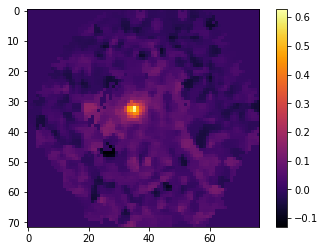

In [10]:
#para poder visualizar una slice basta con usar la función imshow pía mostró la clase pasada aplicada a una matrix
plt.imshow(data[0],cmap='inferno')
plt.colorbar()

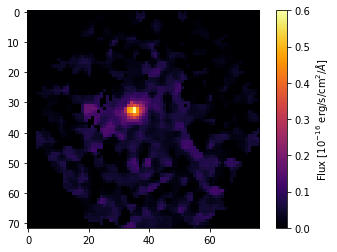

In [11]:
#ahora es necesario entra a refinar
#En primer y acorde al header la información de cada pixel es el flujo en la respectiva longitud de onda
#acorde al header las unidades de medidas son 1e-16 erg/s/cm**2/A
#También se observan flujos negativos, lo cual se debe probablemente a ruido en la cámara

units = header['HIERARCH PIPE UNITS'] #podemos rescatar la unidades con esta key o llave
plt.imshow(data[0],cmap='inferno',vmax=0.6,vmin=0)
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

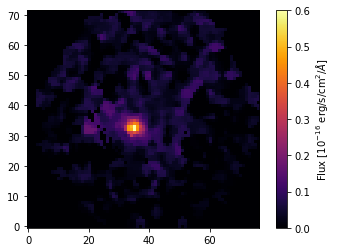

In [12]:
#ahora es necesario entra a refinar
#En primer y acorde al header la información de cada pixel es el flujo en la respectiva longitud de onda
#acorde al header las unidades de medidas son 1e-16 erg/s/cm**2/A
#También se observan flujos negativos, lo cual se debe probablemente a ruido en la cámara

units = header['HIERARCH PIPE UNITS'] #podemos rescatar la unidades con esta key o llave

plt.imshow(data[0],cmap='inferno',vmax=0.6,vmin=0,origin='lower') #vmax y vmin sirven para setear los máximos y minimos del colorbar
#origin='lower' pone el origen en el origen del plano cartesiano
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

Valor 1 en el pixel de referencia =  210.0833690891657
Valor 2 en el pixel de referencia =  38.91524219945943
Valor 3 en el pixel de referencia =  3749.0
Pixel de referencia para variable 1 =  37
Pixel de referencia para variable 2 =  33
Pixel de referencia para variable 3 =  1.0
Step para variable 1 =  -0.00027777777777777
Step para variable 2 =  0.000277777777777777
Step para variable 3 =  2.0


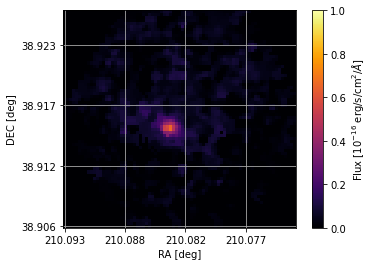

In [13]:
#Lo último que queda es revisar bien los ejes X e Y, hacer que sean variables físicas, ra y dec.

print('Valor 1 en el pixel de referencia = ',header['CRVAL1']) #valor inicial de la RA en el pixel de referencia
print('Valor 2 en el pixel de referencia = ',header['CRVAL2']) #valor inicial de la DEC en el pixel de referencia
print('Valor 3 en el pixel de referencia = ',header['CRVAL3']) #valor inicial de la longitud de onda en el pixel de referencia

print('Pixel de referencia para variable 1 = ', header['CRPIX1']) #pixel de referencia para la RA inicial
print('Pixel de referencia para variable 2 = ', header['CRPIX2']) #pixel de referencia para la DEC inicial
print('Pixel de referencia para variable 3 = ', header['CRPIX3']) #pixel de referencia para la longitud de onda inicial

print('Step para variable 1 = ', header['CD1_1']) #step o paso en deg entre cada pixel para la RA
print('Step para variable 2 = ', header['CD2_2']) #step o paso en deg entre cada pixel para la DEC
print('Step para variable 3 = ', header['CD3_3']) #step o paso en deg entre cada pixel para la Longitud de onda

delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']

delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']

plt.imshow(data[1],cmap='inferno',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

##Espectros

Con estos datos del cubo, podemos observar el espectro de cada pixel de la imagen.
Para ello basta con acceder a la información en cada pixel. 

Text(0, 0.5, 'Flux 10$^{-16}$ erg/s/cm$^2$/$\\AA$')

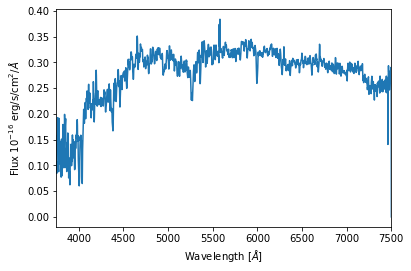

In [14]:
plt.plot(lo,data[:,30,30])
plt.xlim(3750,7500)
#plt.ylim(0,0.16)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

#Database Query

Un *query* es una solicitud a una base de datos para poder acceder a la información que existe en dicha base de datos. En general, los query se hacen en un lenguaje de programación específico para esta tarea llamada SQL, por ahora revisaremos una forma muy sencilla de hacerlo mediante el uso del paque **astroquery**.

In [15]:
!pip install astroquery #esto para instalar astroquery
from astroquery.sdss import SDSS
pos = SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, radius = 2*u.arcsec, spectro=True) #radius por defecto es 2 arcsec
print(xid) #mejor imprimir xid[0] por la visualización
#podemos descargar los datos de todos los objetos encontrados en xid

#Algunas pequeñas funciones de conversión
#print (8*u.arcmin + 5.63*u.arcsec).to(u.deg)
#print (14*u.deg + 50*u.arcmin + 23.3*u.arcsec).to(u.deg)


  Using cached https://files.pythonhosted.org/packages/1b/f8/4690523783691ed816b3469c3ec611af3798594d37ade510dd918d59f57e/astroquery-0.4.1.tar.gz
     |████████████████████████████████| 2.7MB 8.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=d6a2bfd12e87e9e6fb7a6d0ddee2282ea957de005e215dd65c5a34594923f23c
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery
       ra              dec               objid        ... run2d instrument
---------------- ---------------- ------------------- ... ----- ----------
2.02344596573482 14.8398237551311 1237652943176138868 ...    26       SDSS


/usr/local/lib/python3.6/dist-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [16]:
sp = SDSS.get_spectra(matches=xid)
img = SDSS.get_images(matches=xid, band='g') #fotometría en la banda g
imu = SDSS.get_images(matches=xid, band='u') #fotometría en la banda u

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 1.95731103931  14.8741582709  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : -1.50798651053e-06  0.000109980376596  
CD2_1 CD2_2  : 0.000109913029257  1.50898710573e-06  
NAXIS : 2048  1489
Valor 1 en el pixel de referencia =  1.95731103931
Valor 2 en el pixel de referencia =  14.8741582709
Pixel de referencia para variable 1 =  1025.0
Pixel de referencia para variable 2 =  745.0
Step para variable 1 =  -1.50798651053e-06
Step para variable 2 =  1.50898710573e-06


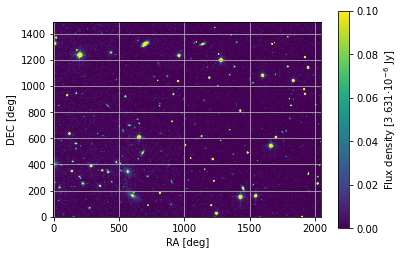

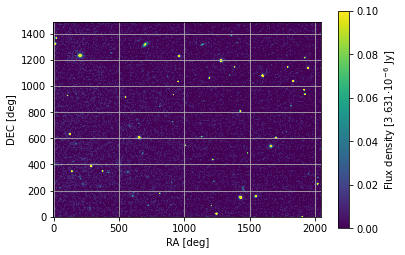

In [19]:
#Hojiemos la fotometría
#print repr(imu[0][0].header)

header = img[0][0].header
wcs = WCS(header) #permite leer el header world coordinate system
print(wcs)

print('Valor 1 en el pixel de referencia = ',header['CRVAL1']) #valor inicial de la RA en el pixel de referencia
print('Valor 2 en el pixel de referencia = ',header['CRVAL2']) #valor inicial de la DEC en el pixel de referencia

print('Pixel de referencia para variable 1 = ', header['CRPIX1']) #pixel de referencia para la RA inicial
print('Pixel de referencia para variable 2 = ', header['CRPIX2']) #pixel de referencia para la DEC inicial

print('Step para variable 1 = ', header['CD1_1']) #step o paso en deg entre cada pixel para la RA
print('Step para variable 2 = ', header['CD2_2']) #step o paso en deg entre cada pixel para la DEC

delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']

datag = img[0][0].data
datau = imu[0][0].data

#imagen banda g
plt.imshow(datag,cmap='viridis',origin='lower',vmin=0,vmax=0.1)
#plt.xticks((0,len(ra)/3,2*len(ra)/3,len(ra)),(round(ra[0],3),round(ra[len(ra)/3],3),round(ra[2*len(ra)/3],3),round(ra[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
#plt.yticks((0,len(dec)/3,2*len(dec)/3,len(dec)),(round(dec[0],3),round(dec[len(dec)/3],3),round(dec[2*len(dec)/3],3),round(dec[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen banda u
plt.imshow(datau,cmap='viridis',origin='lower',vmin=0,vmax=0.1)
#plt.xticks((0,len(ra)/3,2*len(ra)/3,len(ra)),(round(ra[0],3),round(ra[len(ra)/3],3),round(ra[2*len(ra)/3],3),round(ra[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
#plt.yticks((0,len(dec)/3,2*len(dec)/3,len(dec)),(round(dec[0],3),round(dec[len(dec)/3],3),round(dec[2*len(dec)/3],3),round(dec[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()


Text(0, 0.5, 'Flux density [10$^{-17}$ erg/cm$^2$/s/$\\AA$]')

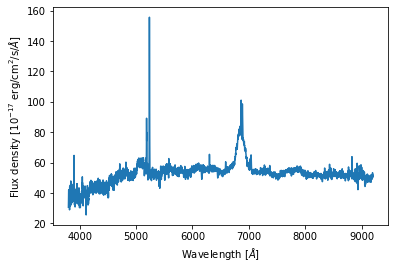

In [20]:
#Revisemos la espectrometría ahora
#print repr(sp[0][0].header)
#print WCS(sp[0][0].header)
fits = sp[0]
#print repr(fits.info())
#print fits[1].columns
scidata = fits[1].data
flux = scidata['flux']
lam = scidata['loglam']
plt.plot(10**(lam), flux)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux density [10$^{-17}$ erg/cm$^2$/s/$\AA$]')